# 이수안컴퓨터연구소 머신러닝 #2 (#1은 패스)

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.49709480668556605
0.5518784789388858


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn-whitegrid'])

C:\Users\John\AppData\Local\Temp\ipykernel_14684\633323959.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


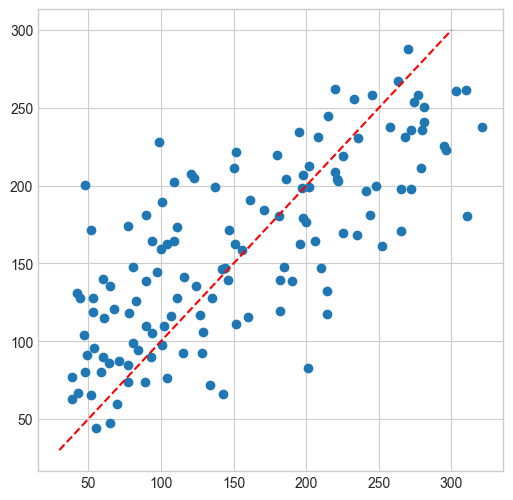

In [3]:
predicted = model.predict(X_test)
expected = y_test
plt.figure(figsize=(6, 6))
plt.scatter(expected, predicted)
plt.plot([30, 300], [30, 300], '--r');

In [4]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(model, diabetes.data, diabetes.target, cv=5)

print(f'교차 검증 정확도 :{scores}')
print(f'교차 검증 정확도 평균 :{scores.mean():.3f}, 표준편차 :{scores.std():.3f}')

교차 검증 정확도 :[0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
교차 검증 정확도 평균 :0.482, 표준편차 :0.049


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

gs = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=10)
result = gs.fit(diabetes.data, diabetes.target)

print(f'opt score  : {result.best_score_}')
print(f'opt params : {result.best_params_}')
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

opt score  : 0.46332219117960366
opt params : {'alpha': 0.1}
Ridge(alpha=0.1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0004,0.000490,0.0002,0.0004,0.001,{'alpha': 0.001},0.554416,0.233683,0.356798,0.620262,0.267029,0.619402,0.419900,0.433004,0.433424,0.684991,0.462291,0.145852,3
1,0.0002,0.000400,0.0002,0.0004,0.01,{'alpha': 0.01},0.546298,0.244129,0.368900,0.613735,0.271714,0.623092,0.426068,0.424745,0.429477,0.680918,0.462908,0.141449,2
2,0.0003,0.000458,0.0002,0.0004,0.1,{'alpha': 0.1},0.526551,0.244984,0.383530,0.606595,0.286090,0.618034,0.431226,0.441777,0.431962,0.662471,0.463322,0.132683,1
3,0.0003,0.000458,0.0002,0.0004,1,{'alpha': 1},0.421594,0.168441,0.358004,0.512609,0.284926,0.514263,0.388244,0.484445,0.396497,0.525135,0.405416,0.108386,4
4,0.0002,0.000400,0.0002,0.0004,10,{'alpha': 10},0.159387,-0.081177,0.152189,0.165690,0.119348,0.186933,0.158146,0.203748,0.153626,0.189441,0.140733,0.077298,5
5,0.0004,0.000490,0.0000,0.0000,100,{'alpha': 100},0.012468,-0.234480,0.013522,-0.012820,0.004838,0.022647,0.022028,-0.009908,0.015589,0.026427,-0.013969,0.074561,6
6,0.0003,0.000458,0.0001,0.0003,1000,{'alpha': 1000},-0.009602,-0.258118,-0.007849,-0.038479,-0.012933,-0.000932,0.001768,-0.042679,-0.004652,0.002744,-0.037073,0.075191,7


In [6]:
import multiprocessing
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

param_grid = [{'penalty' : ['l1', 'l2'],
               'C'       : [2.2, 2.3, 2.4]}]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
result = gs.fit(iris.data, iris.target)

print(f'opt score  : {result.best_score_}')
print(f'opt params : {result.best_params_}')
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

opt score  : 0.9800000000000001
opt params : {'C': 2.3, 'penalty': 'l2'}
LogisticRegression(C=2.3)


c:\Users\John\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\John\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\John\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\John\AppData\Local\Programs\Python\Pyth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000100,0.000300,0.0000,0.00000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,0.020120,0.003629,0.0005,0.00050,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,3
2,0.000000,0.000000,0.0000,0.00000,2.3,l1,"{'C': 2.3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,0.022805,0.004814,0.0004,0.00049,2.3,l2,"{'C': 2.3, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
4,0.000100,0.000300,0.0000,0.00000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
5,0.018604,0.001020,0.0005,0.00050,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


In [7]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

In [8]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris_df.columns)
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris.target, test_size=0.3, stratify=iris.target)

model = LogisticRegression()
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')

train data score : 0.9809523809523809
test data score  : 0.9555555555555556


In [11]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris.target, test_size=0.3, stratify=iris.target)

model = LogisticRegression()
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score  : {model.score(X_test, y_test)}')
# print()

train data score : 0.9333333333333333
test data score  : 0.9111111111111111


In [14]:
# 성능평가지표
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print(f'train data score : {model.score(X_train, y_train)}')
print(f'test data score : {model.score(X_test, y_test)}')

predict = model.predict(X_test)
print(f'accracy : {accuracy_score(y_test, predict)}')

train data score : 0.96
test data score : 0.9566666666666667
accracy : 0.9566666666666667


In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)


[[142   2]
 [ 11 145]]


In [16]:
confmat[0]

array([142,   2], dtype=int64)

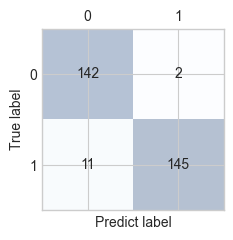

In [17]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')

plt.xlabel('Predict label')
plt.ylabel('True label')
plt.tight_layout();

In [18]:
# precision, recall
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)

print(f'precision : {precision}')
print(f'recall    : {recall}')

precision : 0.9863945578231292
recall    : 0.9294871794871795


In [19]:
# F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predict)
print(f'f1 : {f1}')

f1 : 0.9570957095709571


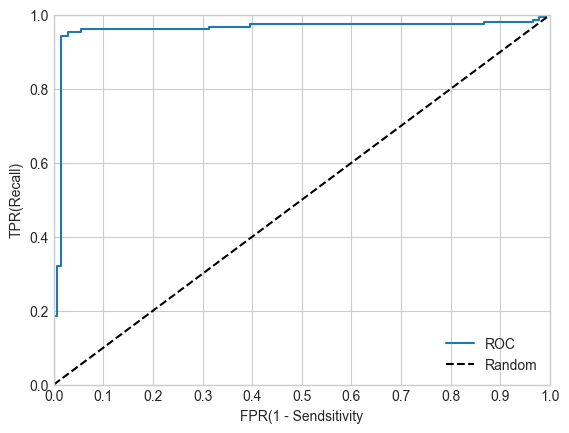

In [20]:
# ROC curve
from sklearn.metrics import roc_curve
import numpy as np
pred_proba_class1 = model.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,2], [0,2], '--k', label='Random')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR(1 - Sendsitivity')
plt.ylabel('TPR(Recall)')
plt.legend();

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, predict)

print(f'roc auc score : {roc_auc}')

roc auc score : 0.9577991452991453
